## Histogram Equalizer - Contrast Adjustment

### Import Libraries 

In [3]:
import numpy as np
import cv2

from matplotlib import pyplot as plt 

%matplotlib inline

### Load the Image 

In [4]:
image = cv2.imread('Image/normal/person5_normal.jpg')

### Plot Pixel Intensity Distribution

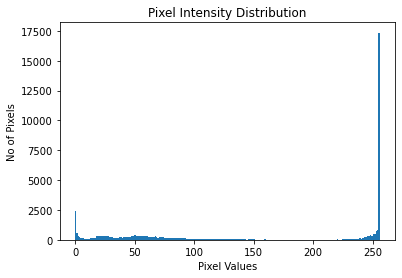

In [5]:
#change the original image to grayscale 
image_gray = cv2.imread('Image/normal/person5_normal.jpg',0)

plt.hist(image_gray.ravel(), 256, [0, 256])
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Values')
plt.ylabel('No of Pixels')
plt.show()

### Count Average Pixel Intensity

In [6]:
width, height = image_gray.shape
print('width, height: ', width, height)

width, height:  225 225


In [7]:
total = 0 

for i in range(0, width): 
    for j in range(0, height): 
        total +=image_gray[i,j]
        
average_pixel = int(total / (width * height))

print('Average pixel: ', average_pixel)

Average pixel:  146


### Applying Histogram Equalizer - Contrast Adjustment

In [ ]:
#applying adaptive histogram equalizer 
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))
clh = clahe.apply(image_gray)
cv2.imshow('With Histogram Equalizer', clh)
cv2.imshow('Without Histogram Equalizer', image_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Plot New Pixel Intensity Distribution

In [ ]:
#plot new pixel intensity distributions 
plt.hist(clh.ravel(), 256, [0, 256])
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Values')
plt.ylabel('No of Pixels')
plt.show()

### Count New Average Pixel Intensity

In [ ]:
new_width, new_height = clh.shape
print('New width, New height: ', new_width, new_height)

In [ ]:
total_new = 0 

for i in range(0, new_width): 
    for j in range(0, new_height): 
        total_new += clh[i,j]
        
new_average_pixel = int(total_new / (new_width * new_height))

print('New Average Pixel: ', new_average_pixel)

### Plot Pixel Intensity Distribution - Comparison
Comparison between with Histogram Equalization and without Histogram Equalization

In [ ]:
plt.hist(image_gray.ravel(), 256, [0, 256], label='without Histogram Equalizer')
plt.hist(clh.ravel(), 256, [0, 256], label='with Histogram Equalizer')
plt.legend(loc='upper right')
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Values')
plt.ylabel('No of Pixels')
plt.show()

In [ ]:
#check video quality based on threshold
def threshold(new_average_pixel): 
    #adjust threshold value for brightness quality
    low_thresh = 100
    high_thresh = 200
    
    if new_average_pixel > low_thresh and new_average_pixel < high_thresh:
        print('Video Brightness: OK')
    elif new_average_pixel > high_thresh: 
        print('Video Brightness: Bright')    
    elif new_average_pixel < low_thresh: 
        print('Video Brightness: Dark')

In [ ]:
#compare pixel intensity with the threshold value
threshold(new_average_pixel)